In [23]:
import torch
import random
from typing import OrderedDict
from torchvision import transforms
from exp import cross_entropy_for_onehot
from recovering import label_recovery
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as SSIM
from skimage.metrics import peak_signal_noise_ratio as PSNR
import numpy as np
import os
from datetime import datetime

CONFIG=OrderedDict(device=torch.device('cpu'),
    dataset="cifar10",
    network="resnet18",
    opt="lbfgs",
    type='label_smooth',
    pretrained=False,
    lr=0.5,
    bound=100,
    iteration=200,
    initia=1.,
    coefficient=1)
test=label_recovery(CONFIG)
test.datadir='/home/yanbo.wang/'+test.datadir
test.datalist='/home/yanbo.wang/'+test.datalist
# test.tt=transforms.ToTensor()
# test.tp=transforms.ToPILImage()
datalist=np.load('/home/yanbo.wang/data/fc_recovery/mixup_list.npy',allow_pickle=True)
direc='/home/yanbo.wang/data/fc_recovery/label_reco/'+CONFIG['type']+'_'+CONFIG['dataset']+'_'+CONFIG['network']+str(CONFIG['pretrained'])+datetime.strftime(datetime.now(),'%Y-%m-%d %H:%M:%S')
exp=np.zeros((10,50,8))#index,prob,featureloss,real_scalar,reco_scalar,scalar_loss,success,time 
#os.makedirs(direc)



In [24]:
for i in range(1):
    choice_index=[2964]
    for i_exp, ind in enumerate(choice_index):
        prob=0.3696062916005061
        test.setup(ind,prob)
        print(choice_index)
        print(test.ground_truth)
# [2964]
# -1.7108138

[2964]
-1.8532834


In [25]:
print(prob)

0.3696062916005061


In [26]:
from torch import optim
test.scalar=torch.tensor([1.])
test.optimizer=optim.LBFGS([test.scalar],lr=test.config['lr'])
test.ground_truth
fake_y=[]
loss=[]
closure=test._pick_closure()

In [27]:
com=list(np.linspace(-6.5,-0.5,num=550))

In [28]:
for i in com:
    test.scalar=i
    test.recover_tensor=test.scalar*test.recover_init
    test.recover_label,_=test._fake_y(test.recover_tensor)
    fake_y.append(test.recover_label)
    loss.append(closure().item())

In [29]:
loss[0]

7.368136882781982

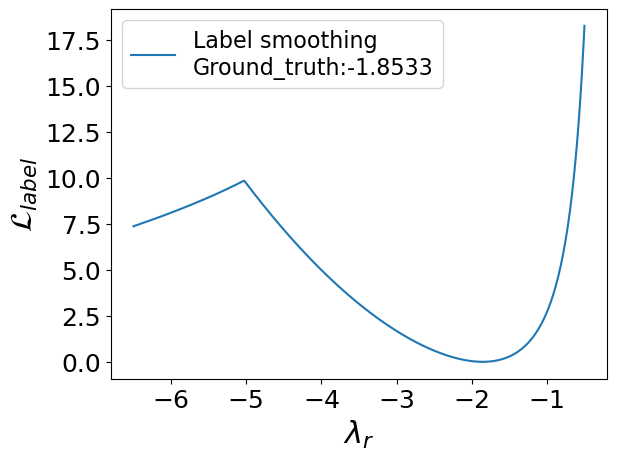

In [30]:
plt.plot(com,loss,label=f'Label smoothing\nGround_truth:{test.ground_truth:.4f}')
#plt.title('Cifar-10 Variance Loss Function under Untrained ResNet18')
plt.xlabel(r'$\lambda_r$',fontsize=22)
plt.ylabel(r"$\mathcal{L}_{label}$",fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.savefig('/home/yanbo.wang/data/image/loss_func_untrained.pdf',bbox_inches='tight')
plt.show()

In [3]:
CONFIG=OrderedDict(device=torch.device('cpu'),
    dataset="cifar10",
    network="resnet18",
    opt="lbfgs",
    type='label_smooth',
    pretrained=True,
    lr=0.5,
    bound=100,
    iteration=200,
    initia=1.,
    coefficient=1)
test=label_recovery(CONFIG)
test.datadir='/home/yanbo.wang/'+test.datadir
test.datalist='/home/yanbo.wang/'+test.datalist
# test.tt=transforms.ToTensor()
# test.tp=transforms.ToPILImage()
datalist=np.load('/home/yanbo.wang/data/fc_recovery/mixup_list.npy',allow_pickle=True)
direc='/home/yanbo.wang/data/fc_recovery/label_reco/'+CONFIG['type']+'_'+CONFIG['dataset']+'_'+CONFIG['network']+str(CONFIG['pretrained'])+datetime.strftime(datetime.now(),'%Y-%m-%d %H:%M:%S')
exp=np.zeros((10,50,8))#index,prob,featureloss,real_scalar,reco_scalar,scalar_loss,success,time 
#os.makedirs(direc)

In [4]:
for i in range(1):
    choice_index=[3823]
    for i_exp, ind in enumerate(choice_index):
        prob=0.35577673108868985
        test.setup(ind,prob)
        print(choice_index)
        print(test.ground_truth)

[3823]
4.2745166


In [5]:
print(prob)

0.35577673108868985


In [8]:
from torch import optim
test.scalar=torch.tensor([1.])
test.optimizer=optim.LBFGS([test.scalar],lr=test.config['lr'])
test.ground_truth
fake_y=[]
loss=[]
closure=test._pick_closure()

In [9]:
com=list(np.linspace(1,5,num=500))

In [10]:
for i in com:
    test.scalar=i
    test.recover_tensor=test.scalar*test.recover_init
    test.recover_label,_=test._fake_y(test.recover_tensor)
    fake_y.append(test.recover_label)
    loss.append(closure().item())

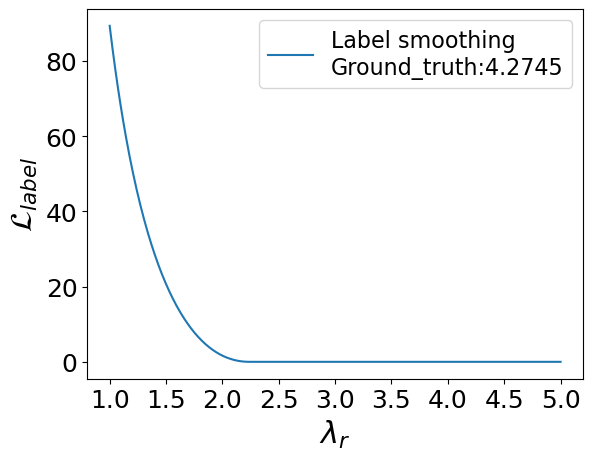

In [11]:
plt.plot(com,loss,label=f'Label smoothing\nGround_truth:{test.ground_truth:.4f}')
#plt.title('Cifar-10 Variance Loss Function under Trained ResNet18')
plt.xlabel(r'$\lambda_r$',fontsize=22)
plt.ylabel(r"$\mathcal{L}_{label}$",fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.savefig('/home/yanbo.wang/data/image/loss_func_trained.pdf',bbox_inches='tight')
plt.show()

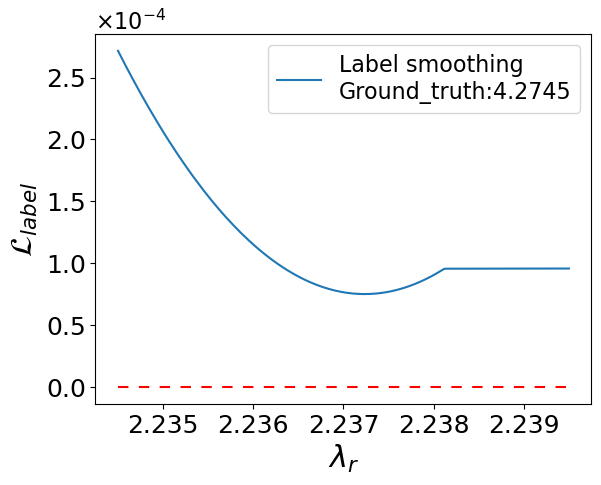

In [14]:
fig, ax = plt.subplots()
plt.plot(commm,lossss,label=f'Label smoothing\nGround_truth:{test.ground_truth:.4f}')
ax=plt.gca()
ax.ticklabel_format(style='sci', scilimits=(0,0.0002), axis='y',useMathText=True)
ax.get_yaxis().get_offset_text().set_fontsize(16)
#plt.title('Cifar-10 Variance Loss Function')
plt.xlabel(r'$\lambda_r$',fontsize=22)
plt.ylabel(r"$\mathcal{L}_{label}$",fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.plot([2.2345,2.2395],[0,0],linestyle=(0, (5, 5)),color='r')
plt.savefig('/home/yanbo.wang/data/image/trained_in_details.pdf',bbox_inches='tight')
plt.show()

In [13]:
lossss=[]
commm=np.linspace(2.2345,2.2395,300)
for i in commm:
    test.scalar=i
    test.recover_tensor=test.scalar*test.recover_init
    test.recover_label,_=test._fake_y(test.recover_tensor)
    fake_y.append(test.recover_label)
    lossss.append(closure().item())